In [1]:
import sys, os
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from projects.ephys.population import Population

In [25]:
from scipy.interpolate import interp1d

In [2]:
from src.utils.path import find
from src.utils.auxiliary import flatten_series
import src.utils.save as ioh5

In [3]:
mpl.rcParams.update({'font.size': 25})
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [4]:
%matplotlib inline

In [5]:
hffm_savepath = '/home/niell_lab/data/freely_moving_ephys/batch_files/021022/hffm'
hffm = Population(savepath=hffm_savepath)
hffm.load(fname='hffm_pop2')

reading from /home/niell_lab/data/freely_moving_ephys/batch_files/021022/hffm/hffm_pop2.pickle


In [9]:
ephys = hffm.data[hffm.data['session']=='070921_J553RT_control_Rig2'].copy()
ephys.reset_index(inplace=True, drop=True)

In [6]:
model_data = ioh5.load('/home/niell_lab/Goeppert/nlab-nas/Dylan/freely_moving_ephys/ephys_recordings/070921/J553RT/fm1/070921_J553RT_ModelData_dt025_rawWorldCam_2ds.h5')
vid = model_data['model_vis_sm_shift']

In [7]:
model_rfs = ioh5.load('/home/niell_lab/data/freely_moving_ephys/RFs/GLM_RFs_070921_RT.h5')
rfs = np.reshape(model_rfs['Cell_NN.0.weight'], (108,5,30,40))

In [10]:
dropinds = [5,13,19,27,34,41,43,47,49,54,56,69,76,105,109,113,119,120,122,125]
useinds = [i for i in ephys.index.values if i not in dropinds]
ephys = ephys.iloc[useinds].reset_index(drop=True)

In [11]:
high_sacc_thresh = 5/.016 # deg/sec
low_sacc_thresh = 3/.016 # deg/sec
gaze_sacc_thresh = 1/.016 # deg/sec
dEye_dps = ephys['FmLt_dEye_dps'].iloc[0]
dGaze = ephys['FmLt_dGaze'].iloc[0]
eyeT = ephys['FmLt_eyeT'].iloc[0]

In [12]:
left = eyeT[(np.append(dEye_dps, 0) > high_sacc_thresh) & (np.append(dGaze,0) > high_sacc_thresh)]
right = eyeT[(np.append(dEye_dps, 0) < -high_sacc_thresh) & (np.append(dGaze, 0) < -high_sacc_thresh)]

In [13]:
trange = hffm.trange
trange_x = hffm.trange_x
def calc_psth(spikeT, eventT):
    psth = np.zeros(trange.size-1)
    for s in np.array(eventT):
        hist, _ = np.histogram(spikeT-s, trange)
        psth = psth + hist / (eventT.size*np.diff(trange))
    return psth

In [14]:
i = 6
row = ephys.iloc[i]
rf = rfs[i,2,:,:]

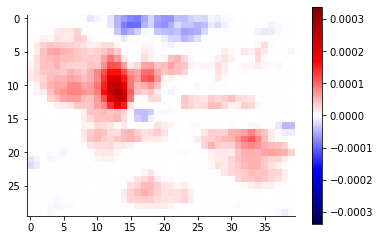

In [15]:
sta_range = np.max(np.abs(rf))*1.2
plt.imshow(rf, vmin=-sta_range, vmax=sta_range, cmap='seismic')
plt.colorbar()

In [16]:
lpsth = calc_psth(row['FmLt_spikeT'], left)
rpsth = calc_psth(row['FmLt_spikeT'], right)

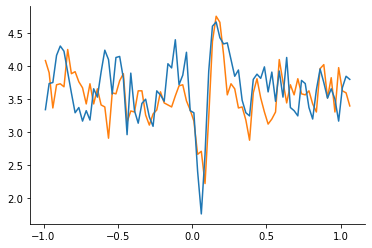

In [17]:
plt.plot(trange_x, lpsth, color='tab:orange')
plt.plot(trange_x, rpsth, color='tab:blue')

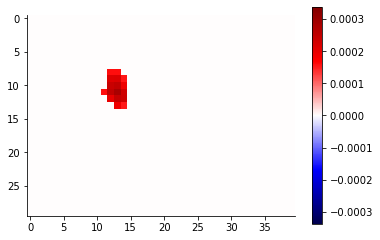

In [18]:
unit_on_subunit = rf.copy()
unit_on_subunit[unit_on_subunit<0.00015] = 0
plt.imshow(unit_on_subunit, vmin=-sta_range, vmax=sta_range, cmap='seismic')
plt.colorbar()

In [50]:
on = unit_on_subunit.copy().repeat(2,axis=0).repeat(2,axis=1)
on[on>0] = True
on[on<0] = False

In [30]:
modelT = model_data['model_t']
dEye = interp1d(eyeT[:-1], dEye_dps, bounds_error=False)(modelT)

In [ ]:
left = eyeT[(np.append(dEye_dps, 0) > high_sacc_thresh) & (np.append(dGaze,0) > high_sacc_thresh)]
right = eyeT[(np.append(dEye_dps, 0) < -high_sacc_thresh) & (np.append(dGaze, 0) < -high_sacc_thresh)]

In [60]:
f0 = vid[450,:,:].copy()
f1 = vid[500,:,:].copy()
f0[on==False] = np.nan
f1[on==False] = np.nan

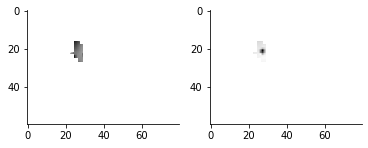

In [64]:
plt.subplots(1,2)
plt.subplot(121)
plt.imshow(f0, cmap='gray')
plt.subplot(122)
plt.imshow(f1, cmap='gray')

In [68]:
rf_vid = vid.copy()

In [69]:
rf_vid[:,on==False] = np.nan

(108707, 60, 80)

In [72]:
contrast = np.std(rf_vid, axis=(1,2))
contrast.shape

(108707,)

In [73]:
dStim = np.diff(contrast)

In [80]:
trange.shape

(84,)

In [86]:
np.argmin(np.abs(trange))

40

In [89]:
i = 350
t = modelT[i]+trange

8.75
[7.75  7.775 7.8   7.825 7.85  7.875 7.9   7.925 7.95  7.975 8.    8.025
 8.05  8.075 8.1   8.125 8.15  8.175 8.2   8.225 8.25  8.275 8.3   8.325
 8.35  8.375 8.4   8.425 8.45  8.475 8.5   8.525 8.55  8.575 8.6   8.625
 8.65  8.675 8.7   8.725 8.75  8.775 8.8   8.825 8.85  8.875 8.9   8.925
 8.95  8.975 9.    9.025 9.05  9.075 9.1   9.125 9.15  9.175 9.2   9.225
 9.25  9.275 9.3   9.325 9.35  9.375 9.4   9.425 9.45  9.475 9.5   9.525
 9.55  9.575 9.6   9.625 9.65  9.675 9.7   9.725 9.75  9.775 9.8   9.825]


In [75]:
left_dStim = 

In [ ]:
plt.plot(imshow)